<a href="https://colab.research.google.com/github/Melo987/-v2/blob/main/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%2B%E5%9F%BA%E7%A1%80%E4%BC%98%E5%8C%96%E7%AE%97%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **08 线性回归**+**基础优化算法** 

**线性回归是机器学习最基础的一个模型**
线性模型可以看作是单层神经网络，线性模型包括一个输入层和一个输出层

神经网络源于神经科学

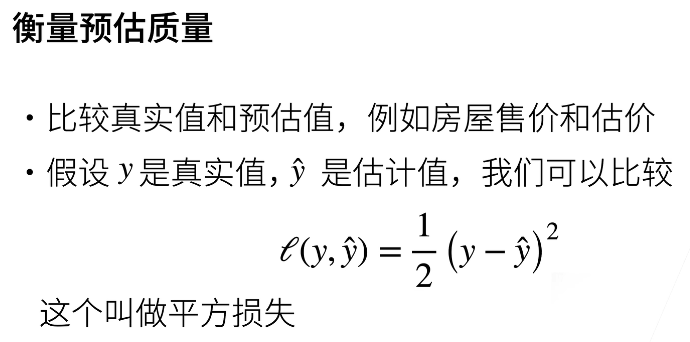

**建立模型---衡量预估质量---训练数据---参数学习---显示解** 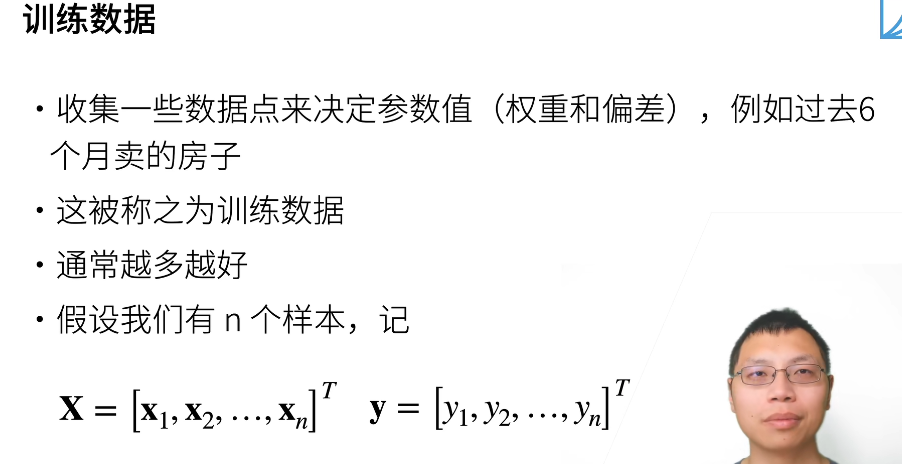





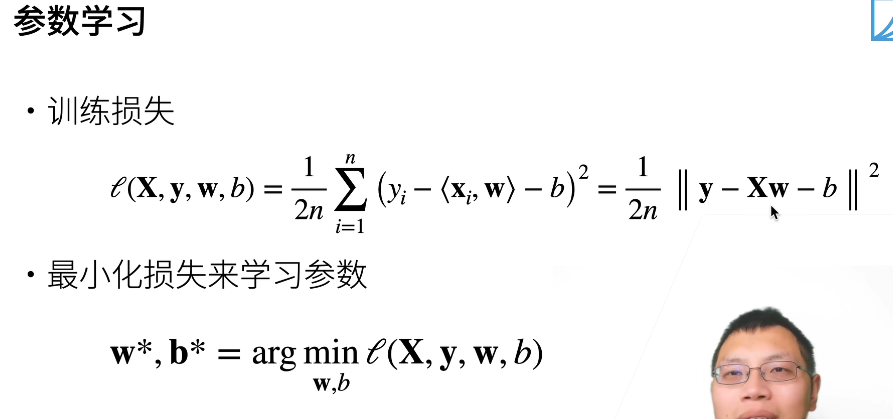

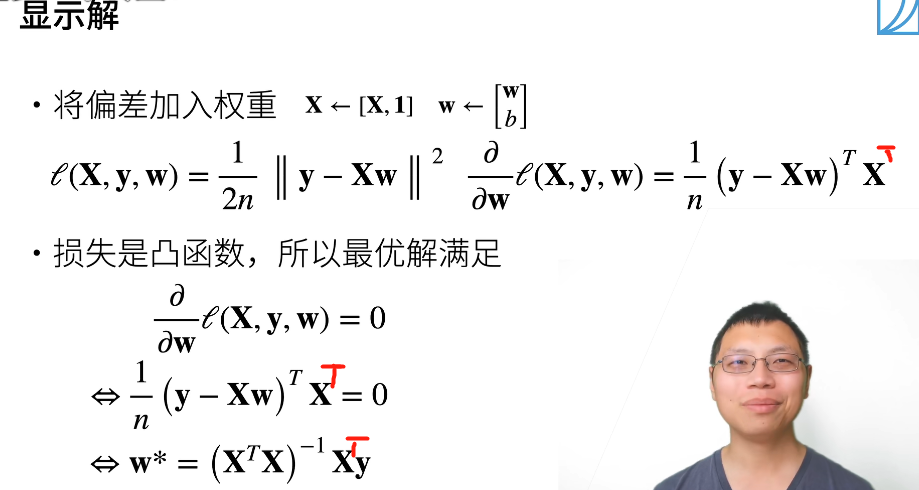

**总结**


*   线性回归是对n维输入的加权，外加偏差
*   使用平方损失来衡量预测值和真实值的差异


*   线性回归有显示解
*   线性回归于可以看作是单层神经网络





# 基础优化方法


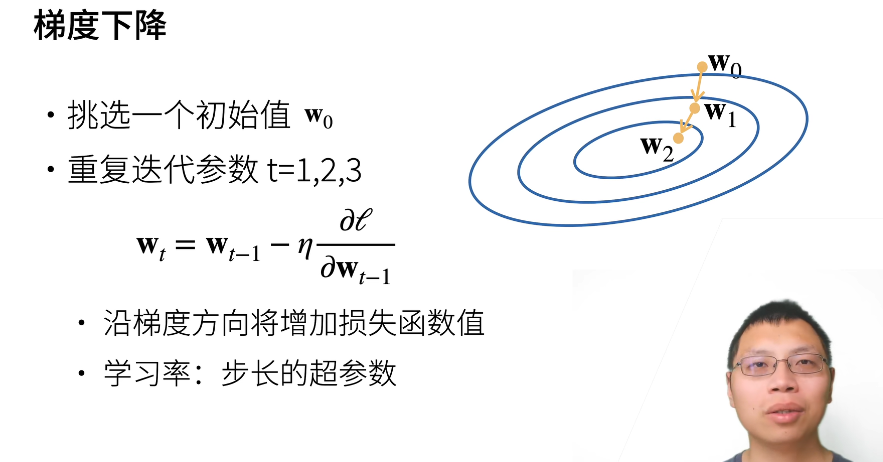

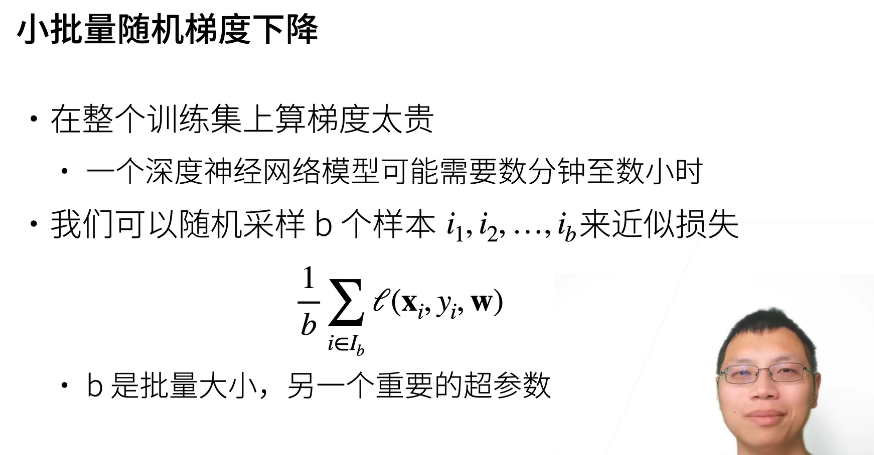

**总结**

*   梯度下降通过不断沿着反梯度方向更新参数求解
*   小批量随机梯度下降是深度学习默认的求解算法

*   两个重要的超参数是批量大小和学习率





# 线性回归从零开始实现

In [ ]:

%matplotlib inline
!pip install -U d2l


ERROR: unknown command "insatll" - maybe you meant "install"
  Using cached d2l-0.17.4-py3-none-any.whl (82 kB)


In [ ]:
! pip install matplotlib==3.0.0
# matplotlib版本过高报错

In [ ]:
%matplotlib inline  
# matplotlib是python的一个外部模块，提供了绘图功能，最初目的是模仿matlab
import random
import torch
from d2l import torch as d2l

In [ ]:
# 生成数据集
# 根据带有噪声的线性模型构造一个人造数据集
# 使用线性模型参数 w = [2，-3，4]T、 b = 4.2 和噪声项c（切他）生成数据集及其标签：y=Xw+b+c

def synthetic_data(w,b,num_examples):
  """生成y=Xw+b+噪声"""
  X = torch.normal(0,1,(num_examples,len(w)))   #  均值为0，方差为1的随机数，n个样本，列数为w的长度
  y = torch.matmul(X,w)+b
  y += torch.normal(0,0.01,y.shape)  # 均值为0，方差为0.01，shape与y相同
  return X,y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)

In [ ]:
# features中的每一行都包含一个二维数据样本，labels中的每一行都包含一维标签值（一个标量）
print('features:',features[0],'\nlabel:',labels[0])

features: tensor([2.7101, 0.4960]) 
label: tensor([7.9265])


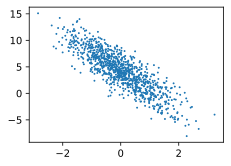

In [ ]:

d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
                labels.detach().numpy(),1)

In [ ]:
# 读取数据集
# 定义一个data_iter函数，该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量
# 每次读取一个小批量
def data_iter(batch_size,features,labels):   # ()里面的代表输入
  num_examples = len(features)
  indices = list(range(num_examples))  # index的函数，下表转化成list
  # 这些样本是随机读取的，没有指定的顺序
  random.shuffle(indices)  # 将下标随机打乱
  for i in range(0,num_examples,batch_size):
    batch_indices = torch.tensor(
        indices[i:min(i+batch_size,num_examples)])
    yield features[batch_indices],labels[batch_indices]

batch_size = 10

for X,y in data_iter(batch_size,features,labels):
  print(X,'\n',y)
  break


tensor([[ 0.0807, -0.9517],
        [ 0.3510, -0.1608],
        [-1.2999,  0.8214],
        [ 0.6356, -0.0667],
        [-0.0188,  0.1652],
        [ 0.2805, -1.2127],
        [ 0.0449, -0.8615],
        [ 1.2504, -0.2348],
        [-0.4473,  1.8399],
        [ 0.1799, -0.5603]]) 
 tensor([[ 7.5921],
        [ 5.4524],
        [-1.1853],
        [ 5.7024],
        [ 3.6037],
        [ 8.8724],
        [ 7.2315],
        [ 7.4980],
        [-2.9591],
        [ 6.4801]])


In [ ]:
# 定义初始化模型参数
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)


In [ ]:
# 定义模型
def linreg(X,w,b):
  """线性回归模型。"""
  return torch.matmul(X,w)+b

In [ ]:
# 定义损失函数
def squared_loss(y_hat,y):
  """均方损失"""
  return (y_hat-y.reshape(y_hat.shape))**2/2

In [ ]:
# 定义优化算法
def sgd(params,lr,batch_size):    # params参数，lr学习率
  """小批量随机梯度下降"""
  with torch.no_grad():
    for param in params:
      param -= lr*param.grad/batch_size
      param.grad.zero_()

In [ ]:
# 训练过程
lr = 0.03
num_epochs = 3
net = linreg   # 模型
loss = squared_loss

for epoch in range(num_epochs):
  for X,y in data_iter(batch_size,features,labels):
    l = loss(net(X,w,b),y)  # x和y的小批量损失
    # 因为l形状是（batch_size,1),而不是一个标量，l中所有的元素被加到一起
    # 并以此计算关于[w,b]的梯度
    l.sum().backward()
    sgd([w,b],lr,batch_size)  # 使用参数的梯度更新参数
  with torch.no_grad():
    train_l = loss(net(features,w,b),labels)
    print(f'epoch {epoch+1},loss {float(train_l.mean()):f}')


epoch 1,loss 0.052687
epoch 2,loss 0.000260
epoch 3,loss 0.000046


In [ ]:
# 比较真是参数和通过训练学到的参数来评估训练的成功程度
print(f'w的误差估计：{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b - b}')

w的误差估计：tensor([-0.0003, -0.0013], grad_fn=<SubBackward0>)
b的估计误差：tensor([0.0004], grad_fn=<RsubBackward1>)


# 线性回归的简洁实现

In [2]:
# 通过使用深度学习框架来简洁实现 线性回归模型 生成数据集
!pip install -U d2l


In [3]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

In [5]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = d2l.synthetic_data(true_w,true_b,1000)
print('features:',features[0],'\nlabels:',labels[0])

features: tensor([ 1.1736, -0.1345]) 
labels: tensor([7.0156])


In [7]:
# 调用框架中现有的API来读取数据
def load_array(data_arrays,batch_size,is_train=True):
  """构造一个pytorch数据迭代器"""
  dataset = data.TensorDataset(*data_arrays)  # features和labels存在，利用该函数生成数据集
  return data.DataLoader(dataset,batch_size,shuffle=is_train)   # 随机挑选数据


In [8]:
batch_size = 10
data_iter = load_array((features,labels),batch_size)  # iterate 迭代

next(iter(data_iter))

[tensor([[-0.0684,  1.2220],
         [-0.6528,  1.0248],
         [ 0.2777, -0.7195],
         [-0.8993, -0.2758],
         [-0.8639, -0.0762],
         [-0.0711, -0.8665],
         [-0.6826, -1.5397],
         [ 0.9962,  0.2464],
         [ 0.6937,  0.2477],
         [ 0.7946,  0.3422]]), tensor([[-0.0894],
         [-0.6000],
         [ 7.2042],
         [ 3.3395],
         [ 2.7381],
         [ 7.0162],
         [ 8.0639],
         [ 5.3491],
         [ 4.7526],
         [ 4.6181]])]

In [9]:
# 使用框架的预定义好的层
from torch import nn   #nn是神经网络的缩写
net = nn.Sequential(nn.Linear(2,1))  # sequential相当于一个容器，将网络一层层按顺序放入其中
                     #输入时2维，输出1维
# Sequential一个有序的容器，神经网络模块将按照在传入构造器的顺序依次被添加到计算图中执行，
#  同时以神经网络模块为元素的有序字典也可以作为传入参数。
                    

In [10]:
# 初始化模型参数
net[0].weight.data.normal_(0,0.01)  # 正态分布
net[0].bias.data.fill_(0)   # 偏差设为0

tensor([0.])

In [11]:
# 计算均方误差使用的是MSELoss类，也称为平方L2范数
loss = nn.MSELoss()

In [12]:
# 实例化SGD实例
trainer = torch.optim.SGD(net.parameters(),lr=0.03)  # SGD(随机梯度下降，gd梯度下降)是一个非常常用的算法，需要三个参数，w，b，lr

In [15]:
# 训练过程
num_epochs = 3
for epoch in range(num_epochs):
  for X,y in data_iter:
    l = loss(net(X),y)
    trainer.zero_grad()
    l.backward()
    trainer.step()
  l = loss(net(features),labels)
  print(f'epoch{epoch+1},loss{l:f}')

epoch1,loss0.000094
epoch2,loss0.000094
epoch3,loss0.000095
